In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests
import json
from pprint import pprint
import scipy.stats as st


In [126]:
csv_path1 = "academics_clean.csv"
academics_clean = pd.read_csv(csv_path1)
academics_clean.columns

Index(['School Name', 'SAT Average Overall',
       '% of Students receiving Federal Loan', 'Title 4 Cost Private',
       'No.of programs offered', 'Tuition FT Enrollment in $', 'Enrollment',
       'Highest degree awarded', 'SAT Writing Midpoint', 'SAT Math Midpoint',
       'SAT Critical Reading Midpoint', 'ACT Writing Midpoint',
       ' ACT Math Midpoint', 'ACT English Midpoint', 'ACT Cumulative Midpoint',
       'Retention Rate FT', 'Completion Rate 4 year (White)',
       'Completion Rate 4 year (2 Or More Races)',
       'Completion Rate 4 year (Hawaian/Pacific Islander)',
       'Completion Rate 4 year (Hispanic)', 'Completion Rate 4 year (Black)',
       'Completion Rate 4 year (Asian)',
       'Completion Rate 4 year (American Indian)', 'General Completion Rate',
       'id', 'Latitude', 'Longitutde'],
      dtype='object')

In [100]:

academics= academics_clean[academics_clean['SAT Average Overall'] != 0]

In [115]:
csv_path2 = "clean_fafsa.csv"
clean_fafsa = pd.read_csv(csv_path2)
clean_fafsa.head()

,School Name,SAT Average Overall,City,Carnegie Classification Undergraduate Profile,Carnegie Size Setting,Public Average Net Price,Private Average Net Price,"Avg $75,001-$110,000 (Public)","Avg $75,000+ (Public)","Avg $48,001-$75,000 (Public)",...,"Avg $30,001-$75,000 (Public)","Avg $30,001-$75,000 (All)","Avg $30,001-$48,000 (Public)","Avg $30,001-$48,000 (All)","Avg $110,000+ (Public)","Avg $110,000+ (All)","Avg $0-$48,000 (Public)","Avg $0-$48,000 (Private)","Avg $0-$30,000 (Public)","Avg $0-$30,000 (Private)"
0,Alabama A & M University,954.0,Normal,10,14,13057.0,0.0,16707.0,17399.0,15508.0,...,13424.0,0.0,12300.0,0.0,18857.0,0,12210.0,0.0,12177.0,0.0
1,University of Alabama at Birmingham,1266.0,Birmingham,9,15,16585.0,0.0,18230.0,19441.0,16847.0,...,16038.0,0.0,15370.0,0.0,20054.0,0,14431.0,0.0,13862.0,0.0
2,University of Alabama in Huntsville,1300.0,Huntsville,15,13,17250.0,0.0,19206.0,19333.0,18572.0,...,16919.0,0.0,14646.0,0.0,19423.0,0,14651.0,0.0,14654.0,0.0
3,Alabama State University,955.0,Montgomery,10,14,13593.0,0.0,20568.0,21072.0,13992.0,...,14127.0,0.0,14170.0,0.0,21938.0,0,13180.0,0.0,12877.0,0.0
4,The University of Alabama,1244.0,Tuscaloosa,12,16,21534.0,0.0,23830.0,24553.0,21957.0,...,21041.0,0.0,20121.0,0.0,24948.0,0,18883.0,0.0,18338.0,0.0


In [116]:
csv_path3 = "demographics_clean.csv"
demographics_clean= pd.read_csv(csv_path3)
demographics_clean.head()

,School Name,School_Id,SAT Average Overall,Student Count,"Requirement; 1:Yes, 2:Rec, 3:Na, 4:Dk, 5:Nan",Admission Rate,4Yr Uni Completion Rates,% White Students,% Hispanic Students,% Black Students,% Asian Students,% AIAN Students,% Female Students,% Male Students,School Latitude,School Longitude
0,Alabama A & M University,100654,954.0,5098.0,5.0,71.60,28.07,1.84,1.14,89.78,0.14,0.27,59.40,40.60,34.78,-86.57
1,University of Alabama at Birmingham,100663,1266.0,13284.0,5.0,88.54,62.45,52.97,6.69,24.58,7.67,0.21,62.10,37.90,33.51,-86.80
2,University of Alabama in Huntsville,100706,1300.0,7358.0,1.0,73.67,60.72,71.96,6.10,8.71,3.57,0.80,40.47,59.53,34.72,-86.64
3,Alabama State University,100724,955.0,3495.0,5.0,97.99,28.43,1.52,1.29,92.59,0.20,0.17,64.95,35.05,32.36,-86.30
4,The University of Alabama,100751,1244.0,30725.0,5.0,78.90,72.23,76.76,5.49,10.50,1.37,0.37,56.15,43.85,33.21,-87.55


In [117]:
csv_path4 = "dependency_df.csv"
dependency_df = pd.read_csv(csv_path4)
dependency_df.head()

,School Name,SAT Average Overall,"% IndepStudents, LowIncome $0-$30,000",% Independent Students,"% DepStudents, LowIncome $0-$30,000","% aided students family income $0-$30,000",% First Generation Students,"% First Gen, Parents w/College","% First Gen, Parents w/MiddleSchool","% First Gen, Parents w/HighSchool",...,% FirstGenStudents Completed 6 Years,% FirstGenStudents Completed 8 Years,% FirstGenStudents Withdrawn 2 Years,% FirstGenStudents Withdrawn 3 Years,% FirstGenStudents Withdrawn 4 Years,% FirstGenStudents Withdrawn 6 Years,% FirstGenStudents Withdrawn 8 Years,id,Latitude,Longitutde
0,Alabama A & M University,954.0,90.16,9.89,56.91,60.20,36.58,63.42,1.64,34.94,...,29.46,28.54,35.83,31.39,35.08,33.17,27.16,10065400,3478.34,-8656.85
1,University of Alabama at Birmingham,1266.0,59.42,32.14,34.87,42.76,34.12,65.88,2.23,31.90,...,51.47,51.95,21.49,23.98,21.83,18.63,16.68,10066300,3350.57,-8679.93
2,University of Alabama in Huntsville,1300.0,68.89,25.16,26.90,37.46,31.01,68.99,1.98,29.03,...,45.39,46.87,23.89,23.72,27.92,19.34,15.91,10070600,3472.46,-8664.04
3,Alabama State University,955.0,92.19,10.74,57.76,61.46,34.34,65.66,1.88,32.46,...,30.16,26.89,34.32,38.82,33.17,30.93,27.49,10072400,3236.43,-8629.57
4,The University of Alabama,1244.0,60.78,14.30,20.38,26.15,22.57,77.43,0.82,21.76,...,57.32,53.28,13.18,14.35,15.25,14.38,14.89,10075100,3321.19,-8754.60


In [118]:
csv_path5 = "gender_completion_clean.csv"
gender_completion_clean = pd.read_csv(csv_path5)
gender_completion_clean.head()

,School Name,SAT Average Overall,% Male Students Completed within 2yrs,% Male Students Completed within 3yrs,% Male Students Completed within 4yrs,% Male Students Completed within 6yrs,% Male Students Completed within 8yrs,% Male Students Withdrawn by 2yrs,% Male Students Withdrawn by 3yrs,% Male Students Withdrawn by 4yrs,...,% Female Students Completed within 6yrs,% Female Students Completed within 8yrs,% Female Students Withdrawn by 2yrs,% Female Students Withdrawn by 3yrs,% Female Students Withdrawn by 4yrs,% Female Students Withdrawn by 6yrs,% Female Students Withdrawn by 8yrs,School_Id,School Latitude,School Longitude
0,Alabama A & M University,954.0,4.07,8.13,17.64,24.46,25.57,37.35,35.40,42.42,...,35.75,31.80,29.71,25.18,28.76,23.31,19.67,10065400,3478.34,-8656.85
1,University of Alabama at Birmingham,1266.0,13.68,28.87,42.53,50.99,50.36,22.39,26.36,24.80,...,55.81,56.91,18.91,19.29,18.64,15.08,12.32,10066300,3350.57,-8679.93
2,University of Alabama in Huntsville,1300.0,6.24,23.53,34.67,48.11,47.63,21.94,26.34,31.40,...,48.01,51.02,19.80,17.90,23.15,14.54,10.17,10070600,3472.46,-8664.04
3,Alabama State University,955.0,5.45,8.79,19.45,25.00,22.30,39.81,46.44,38.90,...,36.87,32.30,28.43,31.68,27.49,21.69,19.84,10072400,3236.43,-8629.57
4,The University of Alabama,1244.0,10.72,36.70,53.26,58.25,55.64,13.47,15.87,15.95,...,64.64,60.68,9.29,10.02,10.93,9.10,9.08,10075100,3321.19,-8754.60


In [119]:
csv_path6 = "income_clean.csv"
income_clean = pd.read_csv(csv_path6)
income_clean.head()

,School Name,SAT Average Overall,Median Family Income,% of Low Income that completed within 4 years,% of Low Income that completed within 6 years,% of Low Income that completed within 8 years,% of Low Income that withdrew within 2 years,% of Low Income that withdrew within 3 years,% of Low Income that withdrew within 4 years,% of Low Income that withdrew within 6 years,...,% of High Income that completed 6 years,% of High Income that completed 8 years,% of High Income that withdrew within 2 years,% of High Income that withdrew within 3 years,% of High Income that withdrew within 4 years,% of High Income that withdrew within 6 years,% of High Income that withdrew within 8 years,id,Latitude,Longitude
0,Alabama A & M University,954.0,23553.0,19.77,28.30,26.57,34.86,31.94,38.11,32.79,...,34.95,33.00,25.00,18.60,21.23,24.27,23.00,100654,34.78,-86.57
1,University of Alabama at Birmingham,1266.0,34489.0,44.10,47.60,47.75,22.33,24.74,22.51,20.82,...,62.65,63.41,15.11,16.65,17.67,12.96,12.31,100663,33.51,-86.80
2,University of Alabama in Huntsville,1300.0,44787.0,33.21,43.55,44.86,25.52,23.06,28.30,21.88,...,54.58,53.19,16.30,19.14,27.62,18.63,13.83,100706,34.72,-86.64
3,Alabama State University,955.0,22080.0,21.06,29.79,24.35,35.23,40.99,34.55,31.74,...,51.63,42.06,20.22,20.34,19.13,15.03,16.82,100724,32.36,-86.30
4,The University of Alabama,1244.0,66733.0,48.02,50.86,48.33,15.43,17.84,17.64,18.32,...,69.87,69.26,7.56,8.87,9.71,7.54,7.33,100751,33.21,-87.55


In [120]:
test = academics["SAT Average Overall"].head(1004)

In [121]:
white_df = academics["Completion Rate 4 year (White)"]
white_df = white_df.drop(white_df[white_df.eq(0)].index)
white_df

0       30.43
1       62.76
2       60.98
3       36.36
4       74.68
        ...  
1021    47.97
1022    65.58
1024    42.86
1025    25.30
1026    74.62
Name: Completion Rate 4 year (White), Length: 1004, dtype: float64

The r-squared is: 0.006163928290594837


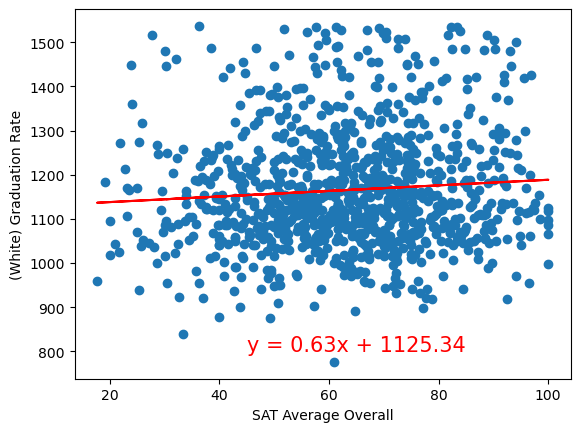

In [164]:
# White Graduation Rate vs SAT Average Overall
x_values = white_df.values
y_values = test
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,800),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('(White) Graduation Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [123]:
#nhis_df = academics['Completion Rate 4 year (Hawaian/Pacific Islander)']
#nhis_df = nhis_df.drop(nhis_df[nhis_df.eq(0)].index)
academics.columns

Index(['School Name', 'SAT Average Overall',
       '% of Students receiving Federal Loan', 'Title 4 Cost Private',
       'No.of programs offered', 'Tuition FT Enrollment in $', 'Enrollment',
       'Highest degree awarded', 'SAT Writing Midpoint', 'SAT Math Midpoint',
       'SAT Critical Reading Midpoint', 'ACT Writing Midpoint',
       ' ACT Math Midpoint', 'ACT English Midpoint', 'ACT Cumulative Midpoint',
       'Retention Rate FT', 'Completion Rate 4 year (White)',
       'Completion Rate 4 year (2 Or More Races)',
       'Completion Rate 4 year (Hawaian/Pacific Islander)',
       'Completion Rate 4 year (Hispanic)', 'Completion Rate 4 year (Black)',
       'Completion Rate 4 year (Asian)',
       'Completion Rate 4 year (American Indian)', 'General Completion Rate',
       'id', 'Latitude', 'Longitutde'],
      dtype='object')

In [124]:
test2 = academics["SAT Average Overall"].head(601)
test2

0       954.0
1      1266.0
2      1300.0
3       955.0
4      1244.0
        ...  
596    1516.0
597     951.0
598     923.0
599    1086.0
600    1055.0
Name: SAT Average Overall, Length: 601, dtype: float64

The r-squared is: 0.0007621473174773386


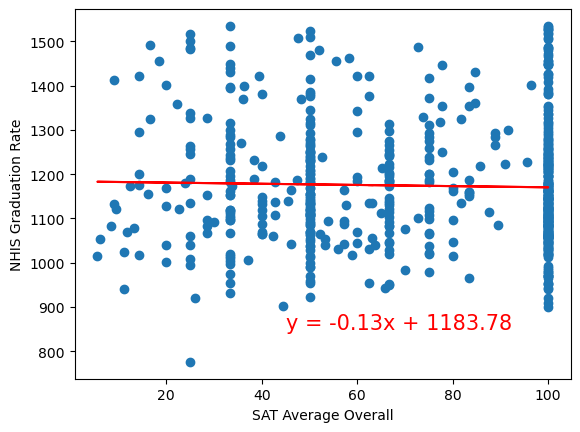

In [162]:
x_values = nhis_df.values
y_values = test2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,850),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('NHIS Graduation Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [127]:
retention_df = academics['Retention Rate FT']
retention_df = retention_df.drop(retention_df[retention_df.eq(0)].index)
retention_df

0       57.97
1       83.92
2       78.99
3       64.36
4       88.55
        ...  
1021    74.15
1022    81.31
1024    60.12
1025    72.00
1026    86.89
Name: Retention Rate FT, Length: 1015, dtype: float64

In [131]:
test7 = academics["SAT Average Overall"].head(1015)
test7

0        954.0
1       1266.0
2       1300.0
3        955.0
4       1244.0
         ...  
1010    1120.0
1011     945.0
1012    1048.0
1013    1195.0
1014    1066.0
Name: SAT Average Overall, Length: 1015, dtype: float64

The r-squared is: 0.010770466962808438


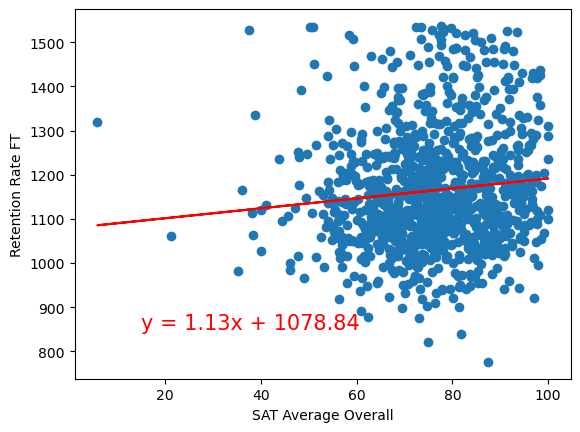

In [159]:
x_values = retention_df
y_values = test7
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,850),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Retention Rate FT')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [139]:
test6 = academics["SAT Average Overall"].head(893)
test6

0       954.0
1      1266.0
2      1300.0
3       955.0
4      1244.0
        ...  
888    1060.0
889    1392.0
890    1085.0
891    1342.0
892    1185.0
Name: SAT Average Overall, Length: 893, dtype: float64

In [140]:
mr_df = academics['Completion Rate 4 year (2 Or More Races)']
mr_df = mr_df.drop(mr_df[mr_df.eq(0)].index)
mr_df

0        32.14
1        50.00
2        60.00
3         6.25
4        66.49
         ...  
1018     75.00
1021     48.06
1022    100.00
1024     16.67
1026     67.11
Name: Completion Rate 4 year (2 Or More Races), Length: 893, dtype: float64

The r-squared is: 0.0013825436949863274


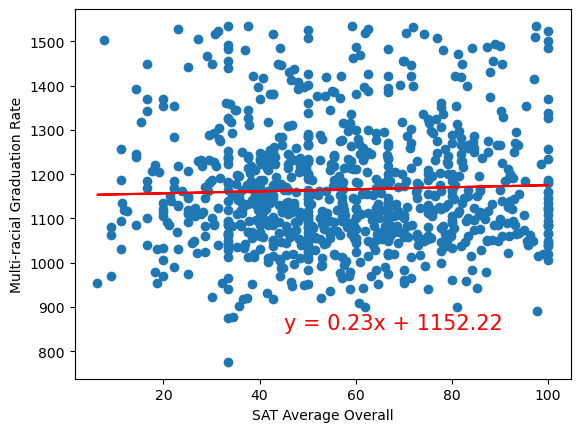

In [158]:
x_values = mr_df.values
y_values = test6
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,850),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Multi-racial Graduation Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()